In [1]:
pip install pandas

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_complaints_1.csv')

# Display the first few rows to understand the structure
print(df.head())

                        author      posted_on  rating  \
0  Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
1     Vera of Philadelphia, PA  Nov. 19, 2016       1   
2  Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
3     Dennis of Manchester, NH  Nov. 16, 2016       1   
4         Ryan of Bellevue, WA  Nov. 14, 2016       1   

                                                text  
0  I used to love Comcast. Until all these consta...  
1  I'm so over Comcast! The worst internet provid...  
2  If I could give them a negative star or no sta...  
3  I've had the worst experiences so far since in...  
4  Check your contract when you sign up for Comca...  


In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already done
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Stem the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Azif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Preprocess the complaints text
df['Processed_Text'] = df['text'].apply(preprocess_text)

# Display the first few rows of the preprocessed text
print(df[['text', 'Processed_Text']].head())

                                                text  \
0  I used to love Comcast. Until all these consta...   
1  I'm so over Comcast! The worst internet provid...   
2  If I could give them a negative star or no sta...   
3  I've had the worst experiences so far since in...   
4  Check your contract when you sign up for Comca...   

                                      Processed_Text  
0  use love comcast constant updat internet cabl ...  
1  im comcast worst internet provid im take onlin...  
2  could give neg star star review would never wo...  
3  ive worst experi far sinc instal 10416 noth pr...  
4  check contract sign comcast advertis offer mat...  


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the preprocessed text
X = vectorizer.fit_transform(df['Processed_Text'])

# Display the shape of the resulting matrix (samples x features)
print(X.shape)

(19, 705)


In [15]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 5  # Adjust as needed

# Perform KMeans clustering
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

# Predict the clusters
df['Cluster'] = km.predict(X)

# Display the first few rows with their predicted cluster
print(df[['text', 'Cluster']].head())

                                                text  Cluster
0  I used to love Comcast. Until all these consta...        1
1  I'm so over Comcast! The worst internet provid...        1
2  If I could give them a negative star or no sta...        2
3  I've had the worst experiences so far since in...        2
4  Check your contract when you sign up for Comca...        2


In [17]:
from collections import Counter

# Calculate purity
total_samples = len(df)
cluster_label_counts = [Counter(df['Cluster'])]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Purity: 0.3684210526315789


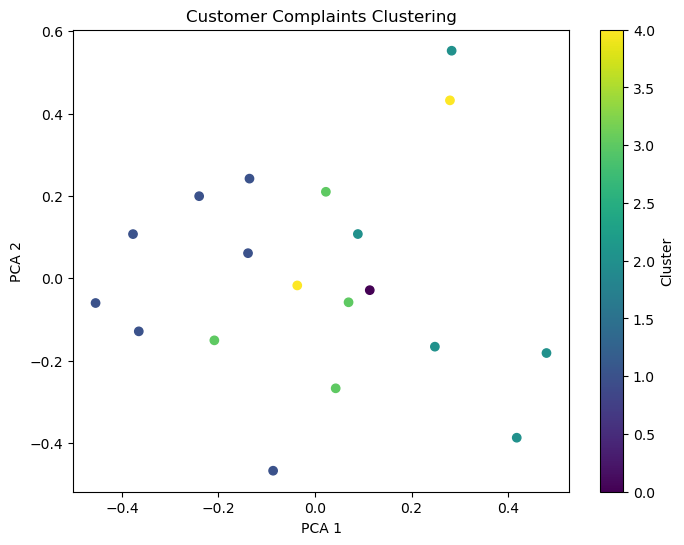

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the 2D PCA representation of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Complaints Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()